In [1]:
from numpy import *

In [2]:
fname = lambda x, y: y

In [3]:
y0 = 1
b  = 10.
h  = 1e-1

In [4]:
def euler(fname,y0,b,h):
    t = arange(0,b,h)
    y = zeros(len(t))
    y[0] = y0
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*fname(t[i],y[i])
    return asarray([t,y])

In [5]:
myres = euler(fname,y0,b,h)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

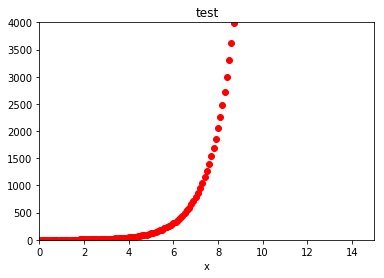

In [7]:
def update_line(num, myres, line):
    line.set_data(myres[..., 0:num])
    return line,

fig = plt.figure()

l, = plt.plot([], [], 'ro')
plt.xlim(0, 15)
plt.ylim(0, 4000)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig, update_line, 100, fargs=(myres, l), interval=50, blit=True)

line_ani.save('full_line.mp4')

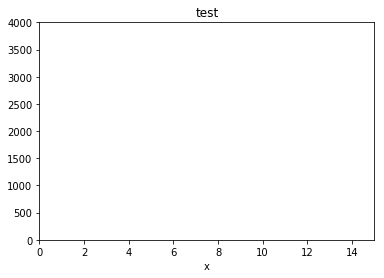

In [8]:
def update_line(num, myres, line):
    line.set_data(myres[..., num-1:num])
    return line,

fig = plt.figure()

l, = plt.plot([], [], 'ro')
plt.xlim(0, 15)
plt.ylim(0, 4000)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig, update_line, 100, fargs=(myres, l), interval=50, blit=True)

line_ani.save('only_traj.mp4')

In [9]:
from IPython.display import HTML
HTML(line_ani.to_html5_video())

In [10]:
Nsphere = 10
G = 6.67259*(10^(-11))
h = 5000
b = 10000000

In [11]:
M = zeros((Nsphere,1))
M[0] = 1.9889e+30  # Masa Sol
M[1] = 0.33*(10^24)# Masa Mercurio
M[2] = 4.87*(10^24)# Masa Venus
M[3] = 5.97*(10^24)# Masa Tierra
M[4] = 0.642*(10^24)# Masa Marte
M[5] = 1899*(10^24)# Masa Jupiter
M[6] = 568*(10^24)# Masa Saturno
M[7] = 86.8*(10^24)# Masa Urano
M[8] = 102*(10^24)# Masa Neptuno
M[9] = 0.0125*(10^24)# Masa Pluton

In [12]:
r = zeros((Nsphere,2))
r[0,:] = [0, 0]            # Sol
r[1,:] = [57.9*(10^9), 0]   # Mercurio
r[2,:] = [108.2*(10^9), 0]  # Venus
r[3,:] = [149.6*(10^9), 0]  # Tierra
r[4,:] = [227.9*(10^9), 0]  # Marte
r[5,:] = [778.6*(10^9), 0]  # Jupiter
r[6,:] = [1433.5*(10^9), 0] # Saturno
r[7,:] = [2872.5*(10^9), 0] # Urano
r[8,:] = [4495.1*(10^9), 0] # Neptuno
r[9,:] = [5870.0*(10^9), 0] # Pluton

In [13]:
v = zeros((Nsphere,2));
v[0,:] = [0, 0]
v[1,:] = [0, 47.89*(10^3)]
v[2,:] = [0, 35.03*(10^3)]
v[3,:] = [0, 29.79*(10^3)]
v[4,:] = [0, 24.13*(10^3)]
v[5,:] = [0, 13.06*(10^3)]
v[6,:] = [0, 9.64*(10^3)]
v[7,:] = [0, 6.80*(10^3)]
v[8,:] = [0, 5.40*(10^3)]
v[9,:] = [0, 4.70*(10^3)]

In [14]:
fk = lambda r: r / ((linalg.norm(r))**3)

In [15]:
def fNB(r,M,k,Nsphere):
    a = zeros((Nsphere,2))
    for p in range(Nsphere):
        for n in range(Nsphere):
            if (n != p):
                a[p,:] += M[n]*k(r[n,:]-r[p,:])
    return a

In [16]:
fname = lambda r,M,k,Nsphere: fNB(r,M,k,Nsphere)

In [17]:
from pdb import *

In [18]:
def euler_fNB(fNB,h,G,b,v0,r0,M,fk,Nsphere):
    R = zeros((Nsphere,2,int(b/h)))
    vt = v0
    rt = r0
    i = 0
    tt = arange(0,b,h)
    for t in tt:
        #set_trace()
        a = fNB(rt,M,fk,Nsphere)
        v = vt + h*G*a
        r = rt + h*vt
        vt = v
        rt = r
        R[:,:,i] = rt
        i = i+1
    return R

In [19]:
R = euler_fNB(fname,h,G,b,v,r,M,fk,Nsphere)

In [20]:
R[0,:,:].shape

(2, 2000)

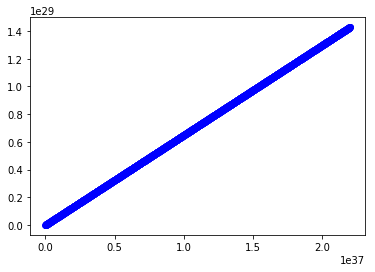

In [21]:
plt.plot(R[1,0,:],R[1,1,:],'bo')